**1**- **Problem** **definition** **and** **understanding**

To analyze and visualize data from the ICC T20 World Cup 2024, providing insights into team performances, player statistics, and overall tournament trends. The goal is to uncover patterns, compare team and player performances, and create visual representations that make the data easily understandable.


**Importing libraries**

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings ## used to ignore warnings
warnings.filterwarnings('ignore')

**loading the** **Data**

 loading the datasets for player bowling stats, player batting stats, and team win percentages.

In [16]:
batting_stats=pd.read_csv(r"/content/Player Batting Stats - Most Runs.csv")
batting_stats
bowling_stats=pd.read_csv(r"/content/Player Bowling Stats - Most Wickets.csv")
bowling_stats
team_stats=pd.read_csv(r"/content/Team - Best Win Percentage.csv")
team_stats

,Position,Team,Win %,Matches,Wins,Lost
0,1,INDIA,100.00,8,8,0
1,2,SOUTH AFRICA,88.89,9,8,1
2,3,WEST INDIES,71.43,7,5,2
3,3,AUSTRALIA,71.43,7,5,2
4,5,AFGHANISTAN,62.50,8,5,3
5,6,ENGLAND,50.00,8,4,3
6,7,SCOTLAND,50.00,4,2,1
7,8,NEW ZEALAND,50.00,4,2,2
8,8,PAKISTAN,50.00,4,2,2
9,10,BANGLADESH,42.86,7,3,4


**Exploring the data**

In [6]:
# Display the first 5 rows of each dataset
bowling_stats.head()

,Position,Team,Player,Matches,Overs,Strike Rate,Wickets
0,1,AFGHANISTAN,Fazalhaq FAROOQI,8,25.2,8.94,17
1,2,INDIA,Arshdeep SINGH,8,30.0,10.58,17
2,3,INDIA,Jasprit BUMRAH,8,29.4,11.86,15
3,4,SOUTH AFRICA,Anrich NORTJE,9,35.0,14.00,15
4,5,AFGHANISTAN,Rashid KHAN,8,29.0,12.42,14


In [7]:

batting_stats.head()

,Position,Team,Player,Matches,Innings,Bat Avg,Runs
0,1,AFGHANISTAN,Rahmanullah GURBAZ,8,8,35.12,281
1,2,INDIA,Rohit SHARMA,8,8,36.71,257
2,3,AUSTRALIA,Travis HEAD,7,7,42.50,255
3,4,SOUTH AFRICA,Quinton DE KOCK,9,9,27.00,243
4,5,AFGHANISTAN,Ibrahim ZADRAN,8,8,28.87,231


In [8]:

team_stats.head()

,Position,Team,Win %,Matches,Wins,Lost
0,1,INDIA,100.00,8,8,0
1,2,SOUTH AFRICA,88.89,9,8,1
2,3,WEST INDIES,71.43,7,5,2
3,3,AUSTRALIA,71.43,7,5,2
4,5,AFGHANISTAN,62.50,8,5,3


In [9]:
# Check for missing values
bowling_stats.isnull().sum(), batting_stats.isnull().sum(), team_stats.isnull().sum()

(Position       0
 Team           0
 Player         0
 Matches        0
 Overs          0
 Strike Rate    0
 Wickets        0
 dtype: int64,
 Position    0
 Team        0
 Player      0
 Matches     0
 Innings     0
 Bat Avg     0
 Runs        0
 dtype: int64,
 Position    0
 Team        0
 Win %       0
 Matches     0
 Wins        0
 Lost        0
 dtype: int64)

**Visualizing** **the** **Data**

Let's create some visualizations to uncover interesting patterns and insights.

In [39]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [50]:
plt.style.use('fivethirtyeight')

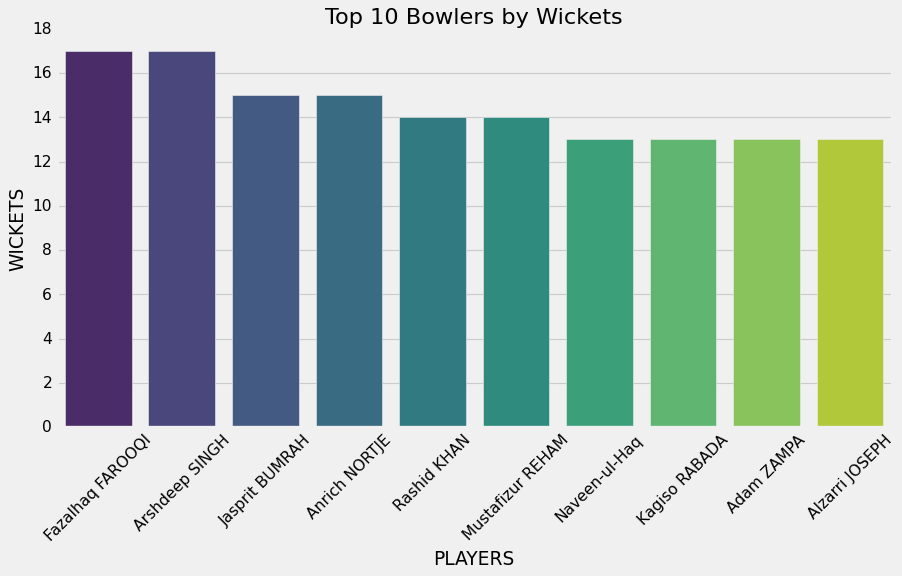

In [51]:
# Top 10 bowlers by wickets
top_bowlers = bowling_stats.nlargest(10, 'Wickets')
plt.figure(figsize=(12, 6))
sns.barplot(y='Wickets', x='Player', data=top_bowlers, palette='viridis')
plt.title('Top 10 Bowlers by Wickets')
plt.xlabel('PLAYERS')
plt.ylabel('WICKETS')
plt.xticks(rotation=45)
plt.show()

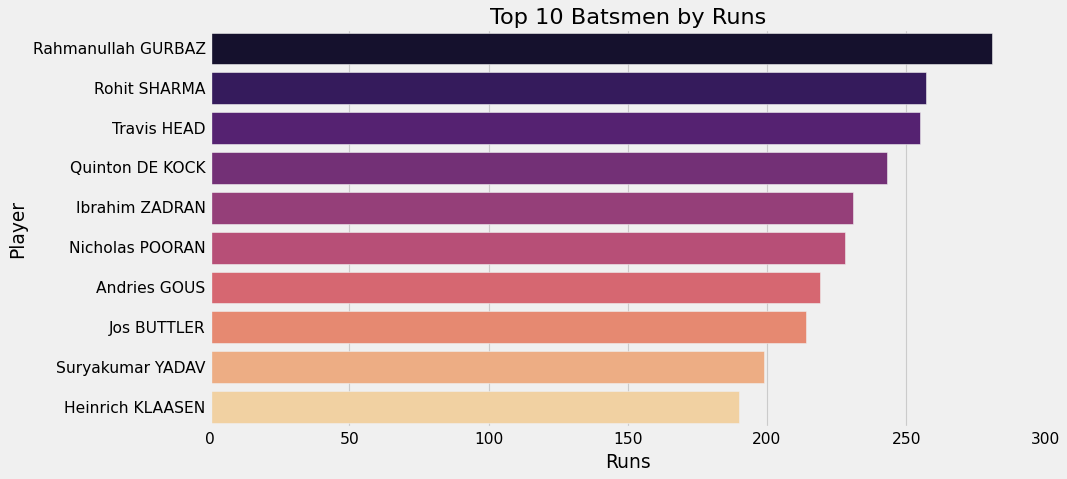

In [52]:
# Top 10 batsmen by runs
top_batsmen = batting_stats.nlargest(10, 'Runs')
plt.figure(figsize=(12, 6))
sns.barplot(x='Runs', y='Player', data=top_batsmen, palette='magma')
plt.title('Top 10 Batsmen by Runs')
plt.xlabel('Runs')
plt.ylabel('Player')
plt.show()

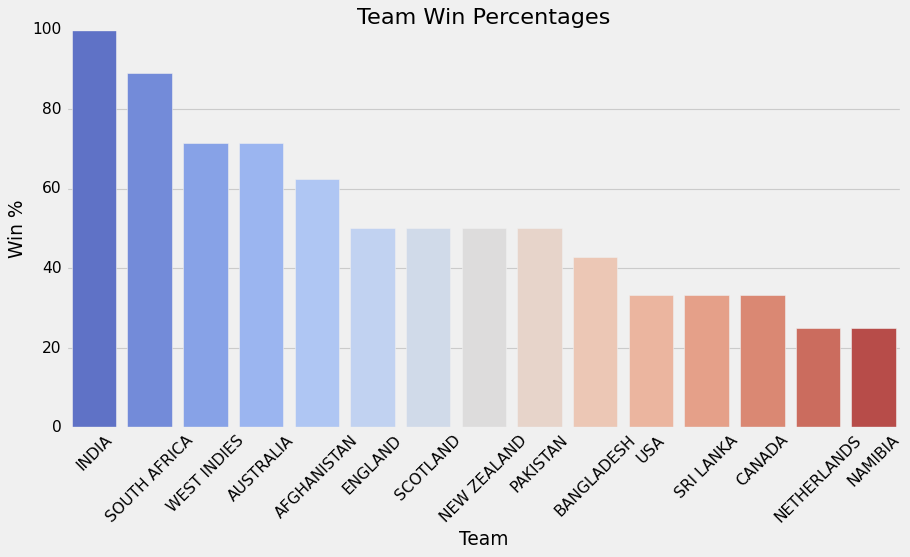

In [55]:
# Team win percentages
plt.figure(figsize=(12, 6))
sns.barplot(x='Team', y='Win %', data=team_stats, palette='coolwarm')
plt.title('Team Win Percentages')
plt.xlabel('Team')
plt.ylabel('Win %')
plt.xticks(rotation=45)  # Rotate player names for better readability
plt.show()

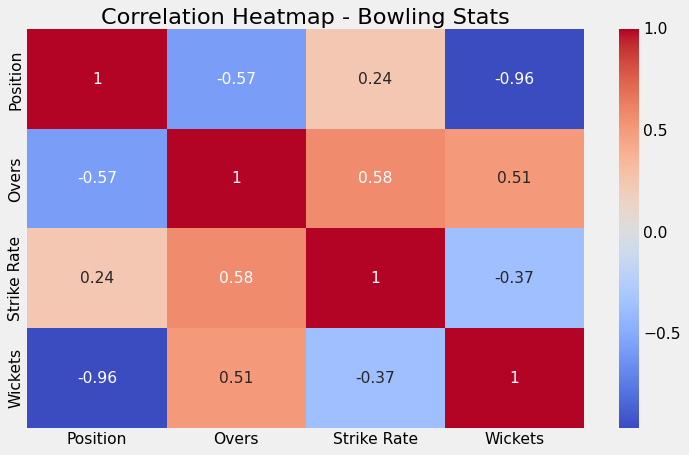

In [56]:
# Correlation heatmap for bowling stats
numeric_bowling = bowling_stats.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_bowling.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Bowling Stats')
plt.show()

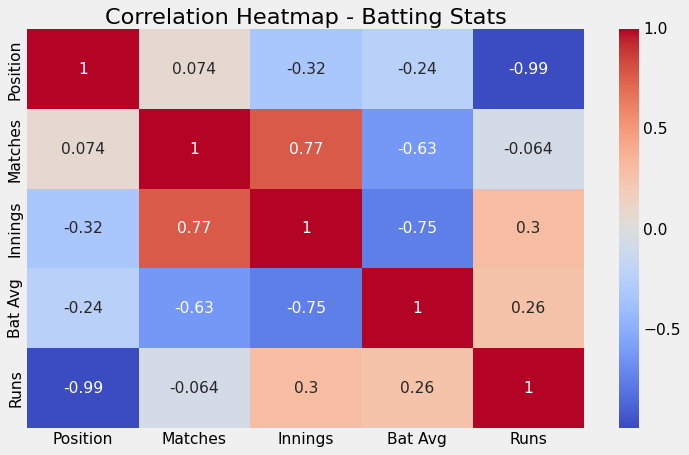

In [57]:
# Correlation heatmap for batting stats
numeric_batting = batting_stats.select_dtypes(include=[np.number])
plt.figure(figsize=(10, 6))
sns.heatmap(numeric_batting.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Batting Stats')
plt.show()

**Conclusion**:


# In this notebook, we explored the top players and teams of the ICC T20 World Cup 2024. We visualized key stats, performed correlation analysis.